In [ ]:
# # 한글 폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

<Figure size 432x288 with 0 Axes>

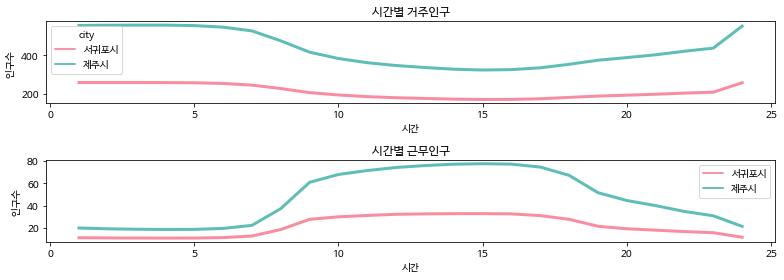

In [ ]:
## 유동인구 데이터
korean = pd.read_csv("/content/drive/MyDrive/2021_빅콘테스트/01_제공데이터/02-1_내국인유동인구_KOREAN.CSV", encoding='CP949')
korean_city = korean.groupby(['time', 'city'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].mean()
korean_city = pd.DataFrame(korean_city)
korean_city.reset_index(inplace=True)

plt.figure()
fig, ax = plt.subplots(2, 1, figsize = (11, 4))
plt.rc('font', family='NanumBarunGothic') 

sns.lineplot('time', 'resd_pop_cnt', data = korean_city, hue = 'city', palette="husl", alpha=.8, linewidth=3, ax=ax[0])
ax[0].set(title='시간별 거주인구', ylabel = '인구수 ', xlabel='시간')

sns.lineplot('time', 'work_pop_cnt', data = korean_city, hue = 'city', palette="husl", alpha=.8, linewidth=3, ax=ax[1])
ax[1].set(title='시간별 근무인구', ylabel = '인구수 ', xlabel='시간')

fig.tight_layout()
plt.legend(loc = 'upper right')
plt.show()

del korean_city

<Figure size 432x288 with 0 Axes>

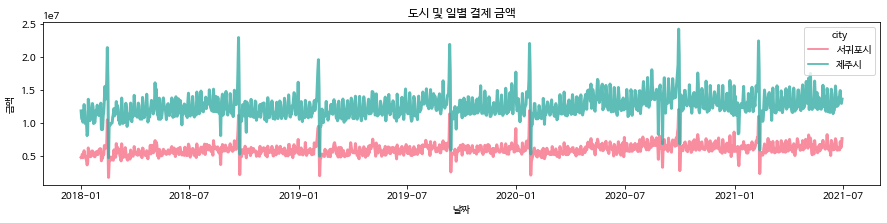

In [ ]:
## 카드소비 데이터
card_spending = pd.read_csv('/content/drive/MyDrive/2021_빅콘테스트/01_제공데이터/04_음식관련 카드소비_CARD_SPENDING.CSV', encoding='CP949')

import datetime as dt

card_spending['base_date'] = pd.to_datetime(card_spending['base_date'])
card_spending['year'] = card_spending['base_date'].dt.year
card_spending['month'] = card_spending['base_date'].dt.month
card_spending['day'] = card_spending['base_date'].dt.day
card_spending['week'] = card_spending['base_date'].dt.week
card_spending['day_of_week'] = card_spending['base_date'].dt.weekday # 월요일 = 0

def func(df):
    d = {}
    d['use_amt_mean'] = df['use_amt'].mean()
    d['use_cnt_mean'] = df['use_cnt'].mean()

    return pd.Series(d, index=['use_amt_mean', 'use_cnt_mean'])
	
card_spending_city = card_spending.groupby(['base_date', 'city']).apply(func)
card_spending_city.reset_index(inplace=True)

plt.figure()
fig= plt.subplots(figsize = (15, 3))
plt.rc('font', family='NanumBarunGothic') 

p = sns.lineplot('base_date', 'use_amt_mean', data = card_spending_city, hue = 'city', palette="husl", alpha=.8, linewidth=3)
plt.title('도시 및 일별 결제 금액')
plt.xlabel('날짜')
plt.ylabel('금액')
plt.show()